In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
import re
import string
import tensorflow as tf

In [3]:
#import datasets 
T_df = pd.read_csv('/Users/symphony/Downloads/True.csv')
F_df = pd.read_csv('/Users/symphony/Downloads/Fake.csv')
T_df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
#preprocessing

#drop unnecessary columns
T_df = T_df.drop(['title', 'subject','date'], axis=1)
F_df = F_df.drop(['title', 'subject','date'], axis=1)


In [5]:
#sample classification; add new boolean column
T_df['class'] = '0'
F_df['class'] = '1'

In [6]:
#concatenate dataframes
df_concat = pd.concat([T_df, F_df])

In [7]:
#random shuffling of the dataframe
df = df_concat.sample(frac = 1)

In [8]:
#look at text before vocab reduction
df.loc[:,"text"].values[0]

'MONROVIA (Reuters) - Liberian former soccer star George Weah and Vice President Joseph Boakai were comfortably ahead in partial presidential election results announced on Saturday, and look set to contest a run-off next month. Weah and Boakai lead the 20-candidate field to succeed Nobel Peace Prize winner Ellen Johnson Sirleaf in what would be Liberia s first democratic transfer of power in more than 70 years. Weah received 39.2 percent of roughly 1.2 million ballots cast in nearly three-quarters of polling stations, ahead of Boakai, who had 29.6 percent of the vote, the commission said. Charles Brumskine, a lawyer, was a distant third with 9.7 percent. The final certified results from Tuesday s poll must be announced by Oct. 25, although provisional results from the remaining precincts are expected in the coming days. The commission said that ballots would be re-cast in two polling places in Nimba County due to irregularities, although that measure only concerns a few thousand votes.

In [9]:
#vocab reduction 

def vocab_clean(text):
    text = text.lower() #lowercase all text
    text = re.sub("[\(\[].*?[\)\]]", "", text) #remove () and [] and content inside
    text = re.sub('\w*\d\w*', '', text) #remove digits
    text = re.sub("\W"," ",text) #remove non-letters
    text = re.sub('_+', '', text) #remove underscores
    text = re.sub('-+', '', text)
    text = " ".join(re.split("\s+", text)) #remove duplicate spaces
    return text

df["text"] = df["text"].apply(vocab_clean)

In [10]:
#look at text after vocab reduction
df.loc[:,"text"].values[0]

'monrovia liberian former soccer star george weah and vice president joseph boakai were comfortably ahead in partial presidential election results announced on saturday and look set to contest a run off next month weah and boakai lead the candidate field to succeed nobel peace prize winner ellen johnson sirleaf in what would be liberia s first democratic transfer of power in more than years weah received percent of roughly million ballots cast in nearly three quarters of polling stations ahead of boakai who had percent of the vote the commission said charles brumskine a lawyer was a distant third with percent the final certified results from tuesday s poll must be announced by oct although provisional results from the remaining precincts are expected in the coming days the commission said that ballots would be re cast in two polling places in nimba county due to irregularities although that measure only concerns a few thousand votes weah became the first non european to win the europea

In [57]:
#removal of stop words with nltk library
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')

df['new_text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df['new_text']

df[0:200]

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/symphony/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,class,new_text
17470,monrovia liberian former soccer star george we...,0,monrovia liberian former soccer star george we...
15330,your announcement to your remaining fan base s...,1,announcement remaining fan base seemed flippan...
5217,penguin random house has landed a deal to pub...,0,penguin random house landed deal publish two f...
16273,,1,
22653,shawn helton century wirewith the united state...,1,shawn helton century wirewith united states he...
...,...,...,...
16445,london while many kenyans fear thursday s elec...,0,london many kenyans fear thursday election run...
6038,a year old is dead after a group of white thug...,1,year old dead group white thugs threatened gun...
2833,washington the senate intelligence committee s...,0,washington senate intelligence committee top d...
21010,beijing china s president xi jinping told indi...,0,beijing china president xi jinping told india ...


In [58]:
df['text'].tolist()[200]

'the fundamental transformation of america watch obama and the democrat party beg tens of millions of people who broke the law when they entered our country to get to the polls to shape the future of our nation leticia de la paz s family has two major motivations for pursuing u s citizenship they want to move past the discrimination they feel as foreign born residents and they want to take part in choosing a leader who as de la paz says will care about immigrants and a better future she shares these sentiments through a spanish language interpreter as her year old daughter gabriela works through a crowded room at nashville s global mall where dozens of middle tennessee immigrants are completing the paperwork that will put them on the path to naturalization we are here in the united states to have a better life and to have better rights says leticia de la paz whose husband came to the united states in and became a citizen last year inspiring their daughter for many this is the next step

In [48]:
#convert text strings in new_text column to vectors
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
corpus = df['new_text']

#instantiate CountVectorizer() 
cv=CountVectorizer() 
#generates word counts for the words in your docs 
word_count_vector=cv.fit_transform(corpus)

word_count_vector.shape


(44898, 100086)

In [59]:
#compute idf values
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True) 
tfidf_transformer.fit(word_count_vector)

# print idf values 
df_idf = pd.DataFrame(tfidf_transformer.idf_, index=cv.get_feature_names(),columns=["idf_weights"]) 
# sort ascending 
#df_idf.sort_values(by=['idf_weights'])
df_idf.iloc[200]


idf_weights    8.18581
Name: abdulaziz, dtype: float64

In [60]:
# count matrix 
count_vector=cv.transform(corpus) 
# tf-idf scores of each document in corpus
tf_idf_vector=tfidf_transformer.transform(count_vector)

In [61]:
tf_idf_vector

<44898x100086 sparse matrix of type '<class 'numpy.float64'>'
	with 7148133 stored elements in Compressed Sparse Row format>

In [62]:
#tf-idf of first doc
feature_names = cv.get_feature_names() 
#get tf-idf vector for first document 
first_document_vector=tf_idf_vector[200] 
#print the scores 
tfidf_df = pd.DataFrame(first_document_vector.T.todense(), index=feature_names, columns=["tfidf"]) 
tfidf_df.sort_values(by=["tfidf"],ascending=False)

,tfidf
corona,0.371221
immigrant,0.333019
paz,0.301166
mayoral,0.192061
nashville,0.191245
...,...
gaut,0.000000
gause,0.000000
gauri,0.000000
gaurav,0.000000


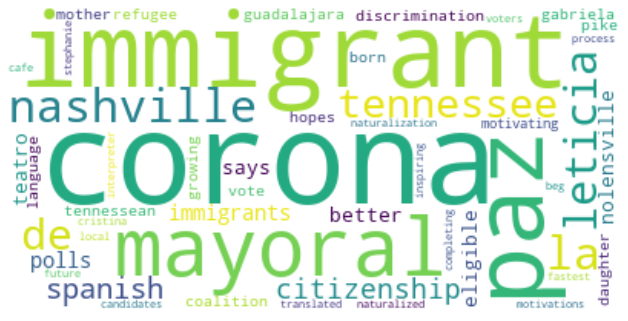

In [63]:
#visualize the tf-idf values of the first document in the dataframe with a wordcloud
from os import path
from PIL import Image
#!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

feature_names = cv.get_feature_names() 
dense = first_document_vector.todense()
lst1 = dense.tolist()
dft = pd.DataFrame(lst1, columns=feature_names)
dft.head()

dft.sum(axis=0)
Cloud = WordCloud(background_color="white", max_words=50).generate_from_frequencies(dft.sum(axis=0))
plt.imshow(Cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [64]:
#quicker way to compute tfidf of corpus

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(min_df=10, use_idf=True)
corpus = df['new_text']

fitted_vectorizer=tfidf_vectorizer.fit(corpus)
tfidf_vectorizer_vectors=fitted_vectorizer.transform(corpus)

tfidf_vectorizer_vectors.shape

(44898, 27241)

In [65]:
#define variables 
x = tfidf_vectorizer_vectors
x = x.toarray().astype(np.float)
y = np.array(df.iloc[:,1])
y = y.astype(np.float)
df.head()

<ipython-input-65-8cf0fb0351a9>:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x = x.toarray().astype(np.float)
<ipython-input-65-8cf0fb0351a9>:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = y.astype(np.float)


,text,class,new_text
17470,monrovia liberian former soccer star george we...,0,monrovia liberian former soccer star george we...
15330,your announcement to your remaining fan base s...,1,announcement remaining fan base seemed flippan...
5217,penguin random house has landed a deal to pub...,0,penguin random house landed deal publish two f...
16273,,1,
22653,shawn helton century wirewith the united state...,1,shawn helton century wirewith united states he...


In [21]:
#split into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [22]:
#check shaoe of X_train
X_train.shape

(30081, 27241)

In [23]:
#build model
import tensorflow.python.keras.backend as K 
sess = K.get_session()
from keras.models import Sequential 
from keras.layers import *

model = Sequential()
model.add(Dense(50, input_dim=27241, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
#check the first element if y 
y[0]

0.0

In [25]:
tb_callback = tf.keras.callbacks.TensorBoard(log_dir = 'logs/', histogram_freq = 1)
%load_ext tensorboard

import datetime, os

logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [26]:
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=5, batch_size=256, callbacks = [tb_callback])

Epoch 1/5
118/118 [==============================] - 10s 80ms/step - loss: 0.3872 - accuracy: 0.9361 - val_loss: 0.1957 - val_accuracy: 0.9571
Epoch 2/5
118/118 [==============================] - 3s 29ms/step - loss: 0.1286 - accuracy: 0.9724 - val_loss: 0.1079 - val_accuracy: 0.9731
Epoch 3/5
118/118 [==============================] - 3s 29ms/step - loss: 0.0697 - accuracy: 0.9873 - val_loss: 0.0779 - val_accuracy: 0.9791
Epoch 4/5
118/118 [==============================] - 3s 29ms/step - loss: 0.0435 - accuracy: 0.9933 - val_loss: 0.0634 - val_accuracy: 0.9816
Epoch 5/5
118/118 [==============================] - 4s 30ms/step - loss: 0.0289 - accuracy: 0.9968 - val_loss: 0.0552 - val_accuracy: 0.9839


In [27]:
%tensorboard --logdir logs

In [28]:
#exploratory analysis
row_sum = tfidf_vectorizer_vectors.sum(axis=1)
row_sum = np.asarray(row_sum)
row_sum = row_sum[:,0].tolist()
class_vector = list(df['class'])
row_sum[0:9]

[9.987428899514985,
 7.692788473864057,
 8.958454035417818,
 0.0,
 11.440876316917922,
 10.817656606130068,
 14.669955063702615,
 8.743591335656799,
 10.364410742047879]

In [29]:
#create new dataframe
df_new = pd.DataFrame(
    {'tfidf_sum': row_sum, 
     'class': class_vector,
    })

df_new.head()

,tfidf_sum,class
0,9.987429,0
1,7.692788,1
2,8.958454,0
3,0.000000,1
4,11.440876,1


In [30]:
df_new = df_new.apply(pd.to_numeric)

In [31]:
grouped_df_new = df_new.groupby(['class'])

meantfidf = grouped_df_new.mean()
meantfidf
#need to run statistical test to see if there is a significant 
#difference in the average tfidf values between real and fake news

,tfidf_sum
class,
0,9.192077
1,9.120123


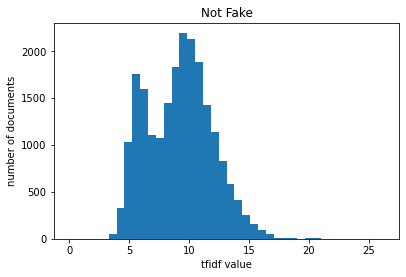

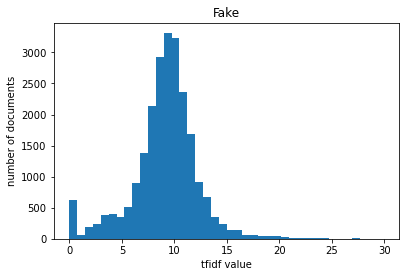

In [33]:
#histograms of the tf-idf values of each document, split by fake and not fake
ax = grouped_df_new.hist(column='tfidf_sum', by='class', bins = 40)

for i,x in enumerate(ax):
    # set x-axis label
    x.set_xlabel("tfidf value", rotation = 0)
    # set y-axis label
    x.set_ylabel("number of documents")
    #set x-ticks
    x.tick_params(axis='x', rotation = 0)
    #set plot titles
    if i == 1:
        x.set_title("Fake")
    if i == 0:
        x.set_title("Not Fake")

In [34]:
! pip install researchpy
import researchpy as rp

In [35]:
summary, results = rp.ttest(group1= df_new['tfidf_sum'][df_new['class'] == 0], group1_name= "Not Fake",
                            group2= df_new['tfidf_sum'][df_new['class'] == 1], group2_name= "Fake")

print(summary)

   Variable        N      Mean        SD        SE  95% Conf.  Interval
0  Not Fake  21417.0  9.192077  2.714962  0.018552   9.155714  9.228440
1      Fake  23481.0  9.120123  3.158407  0.020612   9.079723  9.160523
2  combined  44898.0  9.154446  2.955375  0.013948   9.127108  9.181783


In [36]:
print(results)

                Independent t-test     results
0  Difference (Not Fake - Fake) =       0.0720
1            Degrees of freedom =   44896.0000
2                             t =       2.5769
3         Two side test p value =       0.0100
4        Difference < 0 p value =       0.9950
5        Difference > 0 p value =       0.0050
6                     Cohen's d =       0.0243
7                     Hedge's g =       0.0243
8                 Glass's delta =       0.0265
9                   Pearson's r =       0.0122


In [37]:
import scipy.stats as stats
stats.ttest_ind(df_new['tfidf_sum'][df_new['class'] == 0],
                df_new['tfidf_sum'][df_new['class'] == 1])

Ttest_indResult(statistic=2.5768811949110915, pvalue=0.009972783153526132)

In [38]:
#interpretation: not fake news has more unique words on average ish

([<matplotlib.axis.XTick at 0x153a9fc70>,
 [Text(0, 0, 'Not Fake'), Text(1, 0, 'Fake')])

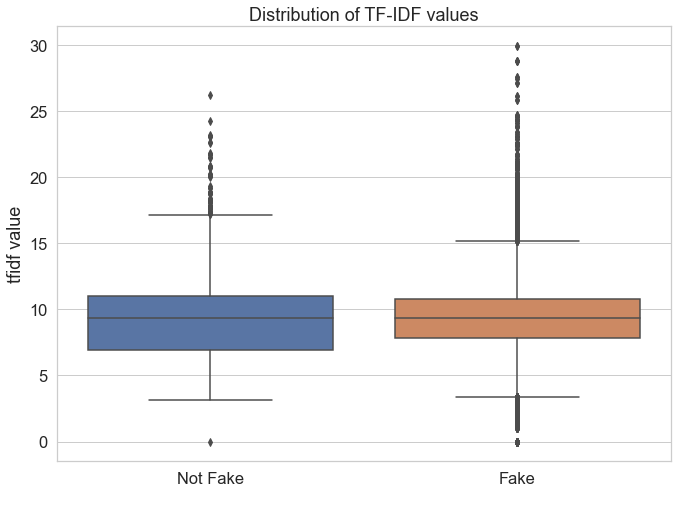

In [39]:
#box plot
sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.5, style='whitegrid')
ax = sns.boxplot(x="class", y="tfidf_sum", data=df_new).set(title ='Distribution of TF-IDF values', xlabel = " ", ylabel='tfidf value')
plt.xticks([0,1],['Not Fake','Fake'])